In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines
import re

In [3]:
url = 'https://raw.githubusercontent.com/shakiltonmoy/Python_for_Biologists/refs/heads/main/Data_for_PCA_Heatmap_Volcano.csv'
df = pd.read_csv(url)
df.head()

,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371


In [5]:
# Define numeric columns explicitly
numeric_columns = df.columns[1:].tolist()
print(numeric_columns)

['WT_1', 'WT_2', 'WT_3', 'hnox_1', 'hnox_2', 'hnox_3']


In [6]:
print(df.shape)

(2694, 7)


In [8]:
#Drop rows with any NaN
df.dropna(inplace = True)
print(df.shape)

(2678, 7)


In [9]:
df


,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371
...,...,...,...,...,...,...,...
2689,hisC,21.932862,21.955808,21.977513,21.873847,21.928867,21.708511
2690,nirS,23.413530,23.395265,23.523621,23.368957,23.312429,23.457762
2691,nirE,17.342587,17.560408,17.546640,16.962248,16.434074,16.883742
2692,nirDL,13.411288,13.616887,13.884577,13.656872,13.329556,13.225657


In [11]:
#Transpose the data (rows = samples, columns = genes)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene']  # Optional: set genes names as column headers
print(transposed_data)

Gene    Pden_0001        rho       mnmE       mnmG       rsmG  Pden_0006  \
WT_1    15.257661  19.323959  17.310870  20.292848  19.390807  20.684619   
WT_2    15.466992  19.185708  17.453550  20.373691  19.493019  20.778670   
WT_3    15.106084  19.439069  17.548070  20.448830  19.472492  20.777643   
hnox_1  15.163709  18.638041  17.745923  20.301087  19.444374  20.616135   
hnox_2  15.350200  18.898438  17.844168  20.528667  19.413354  20.769161   
hnox_3  15.330972  18.546545  17.708122  20.162374  19.539371  20.448940   

Gene    Pden_0007       grpE       hrcA        rph  ...       hemA       ccmC  \
WT_1    21.907452  22.203920  15.117714  18.725861  ...  21.746883  17.928116   
WT_2    21.923479  21.932915  15.174134  18.902229  ...  21.797204  17.899243   
WT_3    21.878476  22.098390  15.028242  18.944088  ...  21.923626  17.838911   
hnox_1  21.894618  21.999408  14.939557  18.252943  ...  21.820238  17.990633   
hnox_2  21.933757  21.970885  14.835387  18.273644  ...  21.88

In [12]:
# STEP 6: Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

In [27]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [28]:
#Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [29]:
# Sample names corresponding to the transposed rows
sample_names = df.columns[1:].tolist()
print(sample_names)

['WT_1', 'WT_2', 'WT_3', 'hnox_1', 'hnox_2', 'hnox_3']


In [30]:
# Define new color map
color_map = {'WT': 'blue', 'Δhnox': 'red'}

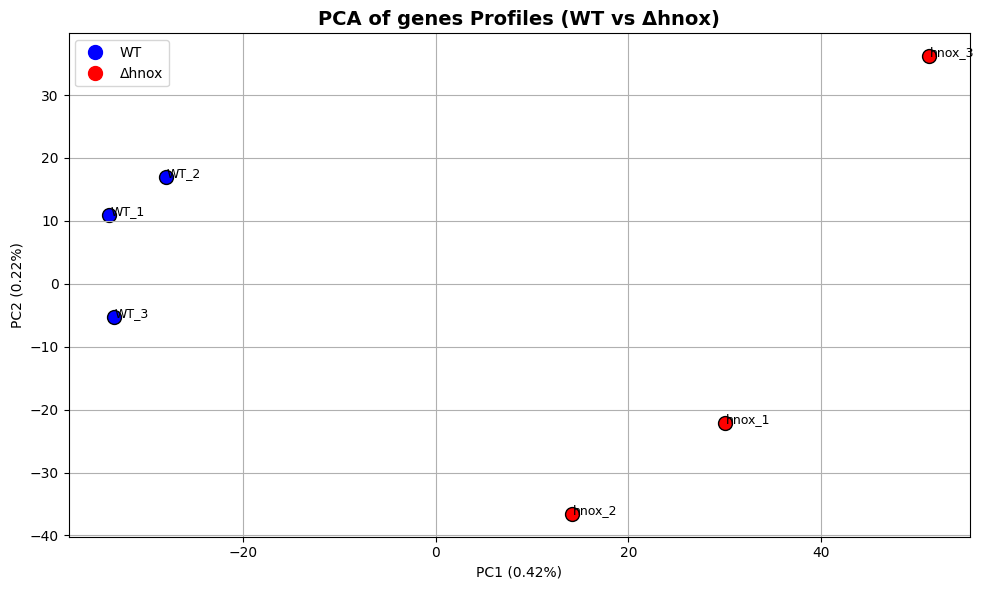

In [31]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()